# Insurance Renewal prediction model- classification

In [1]:
import openml
import pandas as pd
dataset_id = 45064
dataset = openml.datasets.get_dataset(dataset_id)

dataset.description
dataset.retrieve_class_labels


<bound method OpenMLDataset.retrieve_class_labels of OpenML Dataset
Name.........: Insurance
Version......: 1
Format.......: arff
Upload Date..: 2023-01-27 11:18:06
Licence......: Public
Download URL.: https://api.openml.org/data/v1/download/22112022/Insurance.arff
OpenML URL...: https://www.openml.org/d/45064
# of features: None>

In [3]:
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
insurance = pd.concat([X, y], axis=1)
print(insurance.head())

   Upper_Age  Lower_Age  Reco_Policy_Premium City_Code Accomodation_Type  \
0         52         52              16200.0        C2             Owned   
1         67         67              16900.0       C17            Rented   
2         75         75              25668.0       C10             Owned   
3         60         57              17586.8       C26             Owned   
4         35         35              12762.0       C12            Rented   

  Reco_Insurance_Type Is_Spouse Health Indicator Holding_Policy_Duration  \
0          Individual        No               X4                     6.0   
1          Individual        No               X1                     7.0   
2          Individual        No               X3                     3.0   
3               Joint       Yes               X1                     14+   
4          Individual        No               X1                     3.0   

  Holding_Policy_Type  class  
0                 4.0      0  
1                 3.0   

## Fetching Data from 3NF database that created before

In [5]:
import pandas as pd
import sqlite3
def fetch_data_into_dataframe(conn):
    query = """
    SELECT 
        fi.Upper_Age,
        fi.Lower_Age,
        fi.Reco_Policy_Premium,
        c.City_Code,
        a.Accomodation_Type,
        fi.Reco_Insurance_Type,
        fi.Is_Spouse,
        h.Health_Indicator,
        fi.Holding_Policy_Duration,
        fi.Holding_Policy_Type,
        fi.class
    FROM 
        FactInsurance fi
    JOIN 
        City c ON fi.City_ID = c.City_ID
    JOIN 
        Accomodation a ON fi.Accomodation_ID = a.Accomodation_ID
    JOIN 
        HealthIndicator h ON fi.Indicator_ID = h.Indicator_ID;
    """
    df = pd.read_sql_query(query, conn)
    return df
if __name__ == "__main__":
    db_file = "insurance_data.db"
    conn = sqlite3.connect(db_file)
    insurance = fetch_data_into_dataframe(conn)
    print(insurance.head()) 
    
    conn.close()


   Upper_Age  Lower_Age  Reco_Policy_Premium City_Code Accomodation_Type  \
0         52         52              16200.0        C2             Owned   
1         67         67              16900.0       C17            Rented   
2         75         75              25668.0       C10             Owned   
3         60         57              17586.8       C26             Owned   
4         35         35              12762.0       C12            Rented   

  Reco_Insurance_Type Is_Spouse Health_Indicator  Holding_Policy_Duration  \
0          Individual        No               X4                      6.0   
1          Individual        No               X1                      7.0   
2          Individual        No               X3                      3.0   
3               Joint       Yes               X1                     14.0   
4          Individual        No               X1                      3.0   

  Holding_Policy_Type  class  
0                 4.0      0  
1                 

In [7]:
display(insurance)

,Upper_Age,Lower_Age,Reco_Policy_Premium,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,class
0,52,52,16200.0,C2,Owned,Individual,No,X4,6.0,4.0,0
1,67,67,16900.0,C17,Rented,Individual,No,X1,7.0,3.0,1
2,75,75,25668.0,C10,Owned,Individual,No,X3,3.0,1.0,0
3,60,57,17586.8,C26,Owned,Joint,Yes,X1,14.0,1.0,0
4,35,35,12762.0,C12,Rented,Individual,No,X1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
23543,50,50,10908.0,C2,Owned,Individual,No,X1,5.0,3.0,0
23544,64,63,29856.0,C2,Owned,Joint,Yes,X1,12.0,4.0,0
23545,75,75,23028.0,C7,Owned,Individual,No,X1,12.0,2.0,0
23546,38,35,11769.6,C13,Owned,Joint,Yes,X4,5.0,2.0,0


In [682]:
print(insurance.dtypes)

Upper_Age                    int64
Lower_Age                    int64
Reco_Policy_Premium        float64
City_Code                   object
Accomodation_Type           object
Reco_Insurance_Type         object
Is_Spouse                   object
Health_Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type         object
class                        int64
dtype: object


In [9]:
insurance['Holding_Policy_Type'].value_counts()

Holding_Policy_Type
3.0    10237
1.0     6307
2.0     3817
4.0     3187
Name: count, dtype: int64

In [535]:
insurance.count()

Upper_Age                  23548
Lower_Age                  23548
Reco_Policy_Premium        23548
City_Code                  23548
Accomodation_Type          23548
Reco_Insurance_Type        23548
Is_Spouse                  23548
Health_Indicator           23548
Holding_Policy_Duration    23548
Holding_Policy_Type        23548
class                      23548
dtype: int64

In [11]:
display(insurance['Reco_Policy_Premium'].sum())

362851135.8

## Exploratory Data Analysis

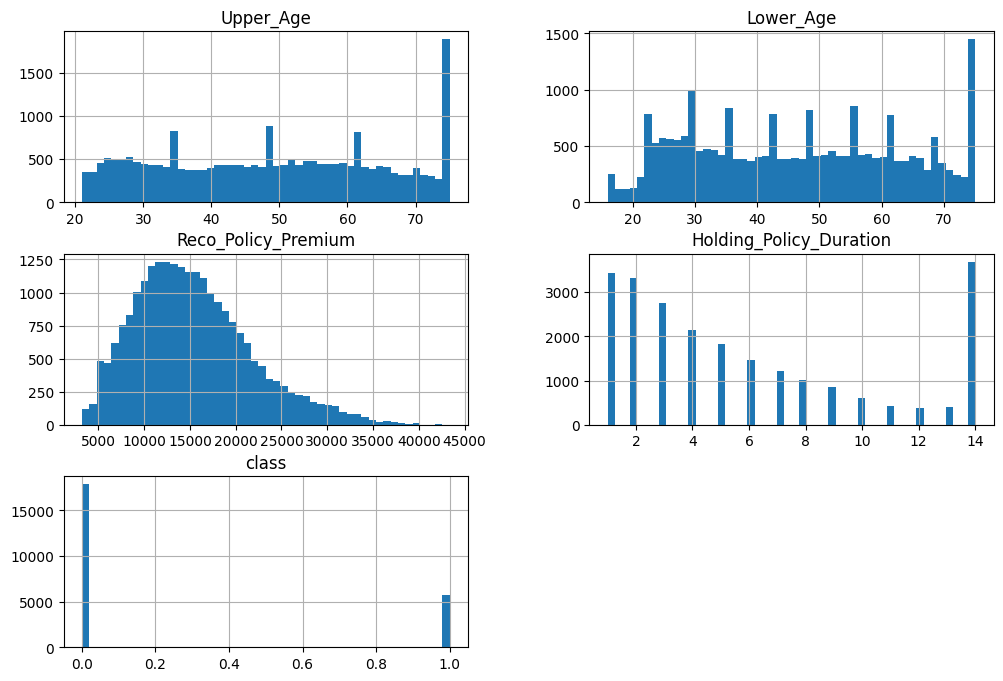

In [13]:
import matplotlib.pyplot as plt

insurance.hist(bins=50, figsize=(12, 8))
plt.show()

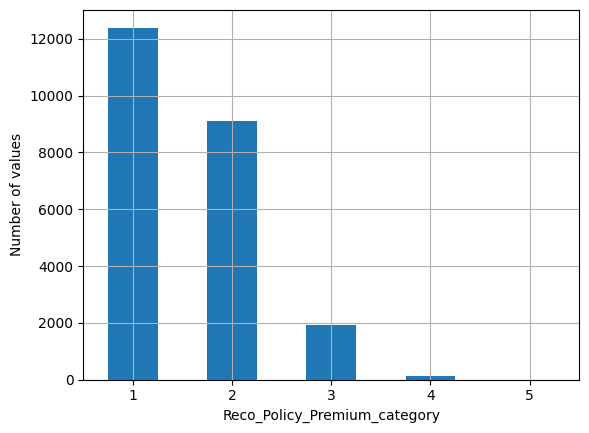

In [15]:
import numpy as np
insurance["Reco_Policy_Premium_cat"] = pd.cut(insurance["Reco_Policy_Premium"], bins=[ 0, 15000,25000,35000,50000, np.inf], labels=[1, 2, 3, 4, 5])
insurance["Reco_Policy_Premium_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Reco_Policy_Premium_category")
plt.ylabel("Number of values")
plt.show()

In [17]:
print(insurance["Reco_Policy_Premium_cat"].isnull().sum())

0


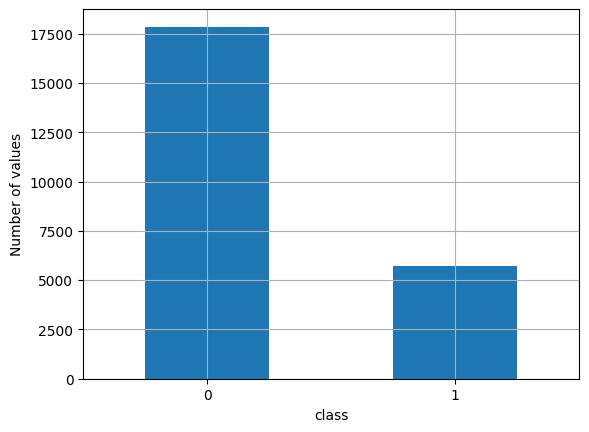

In [19]:
insurance["class"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("class")
plt.ylabel("Number of values")
plt.show()

In [547]:
insurance.drop(columns=["Reco_Policy_Premium_cat"],axis=1, inplace=True)

In [549]:
from sklearn.model_selection import train_test_split
# strat_train_set, strat_test_set = train_test_split(housing, test_size=0.20, stratify=insurance["Reco_Policy_Premium_cat"], random_state=42)
X = insurance.drop(columns=["class"])
y = insurance["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

                         Upper_Age  Lower_Age  Reco_Policy_Premium  \
Upper_Age                 1.000000   0.896605             0.749360   
Lower_Age                 0.896605   1.000000             0.525896   
Reco_Policy_Premium       0.749360   0.525896             1.000000   
Holding_Policy_Duration   0.347818   0.303203             0.244303   
class                    -0.004938  -0.010051             0.002648   

                         Holding_Policy_Duration     class  
Upper_Age                               0.347818 -0.004938  
Lower_Age                               0.303203 -0.010051  
Reco_Policy_Premium                     0.244303  0.002648  
Holding_Policy_Duration                 1.000000  0.022379  
class                                   0.022379  1.000000  


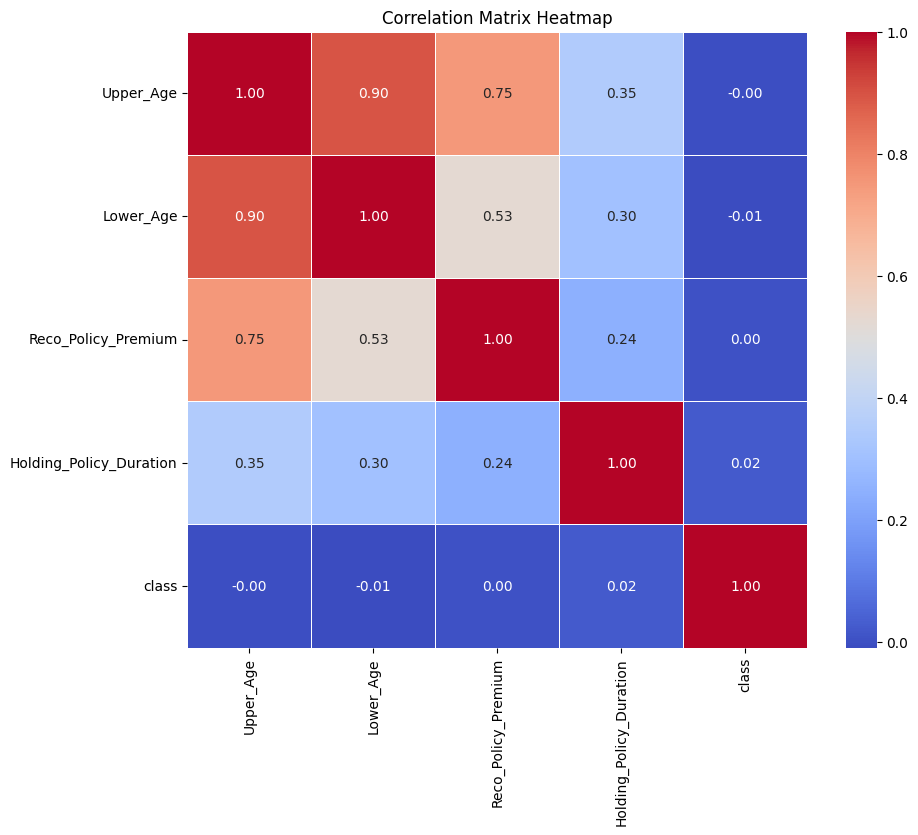

In [551]:
import seaborn as sns
numerical_columns = insurance.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [419]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(insurance, title="Pandas Profiling Report")

In [307]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Exploratory Data Analysis (EDA)**

#### **1. Distribution Analysis**
- **Upper_Age**: The age distribution shows a fairly uniform spread with a peak at the upper boundary (age ~70+). There are smaller peaks at intervals, indicating possible age-based segmentation.
- **Lower_Age**: Similar to Upper_Age, the lower age also shows a uniform spread with a peak at the higher age range. Peaks at intervals suggest possible binning of age groups.
- **Reco_Policy_Premium**: This variable has a right-skewed distribution, with most data concentrated in the range of 10,000 to 20,000. Few values exceed 40,000, indicating potential outliers.
- **Holding_Policy_Duration**: A decreasing trend is observed with most policies held for a short duration (e.g., 2–4 years). A noticeable spike occurs at the maximum duration (~14 years).
- **Class**: The class variable is binary, with a strong imbalance skewed toward one category (likely class `0`), suggesting the need for balancing during modeling.

---

#### **2. Correlation Analysis**
- The correlation matrix highlights relationships between the variables:
  - **Upper_Age and Lower_Age**: Strong positive correlation (~0.90), indicating a linear relationship, as expected due to logical dependence.
  - **Reco_Policy_Premium and Upper_Age**: Moderate correlation (~0.75), suggesting older individuals might prefer higher premiums.
  - **Holding_Policy_Duration**: Weak correlations with all variables (~0.24–0.35), implying less direct influence from other factors.
  - **Class**: Negligible correlation with all numeric variables, indicating weak linear dependency on these predictors.

---

#### **3. Key Insights**
- **Imbalance in Class**: Requires attention during model training through techniques like oversampling, undersampling, or class-weighted algorithms.
- **Potential Outliers**: The tail of the `Reco_Policy_Premium` distribution and peaks in age groups should be examined for outliers or data binning.
- **Feature Engineering Opportunities**:
  - Derive new features from age ranges (e.g., age groups or age bands).
  - Investigate relationships between premium and duration for policy segmentation.


# Experiment 1 - Basic Logistic Regression

In [22]:
import numpy as np
import pandas as pd
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, make_scorer,accuracy_score

num_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")), 
    ("scale", StandardScaler()), 
    ("minmax", MinMaxScaler()),
    ("log", FunctionTransformer(np.log1p, validate=True))# Optional MinMax scaling
])

cat_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),  # Handle missing values
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode
])

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),  # Numeric columns
    (cat_pipeline, make_column_selector(dtype_include=object))  # Categorical columns
)

In [555]:
y_test.value_counts()

class
0    3570
1    1140
Name: count, dtype: int64

In [557]:
display(X_train)

,Upper_Age,Lower_Age,Reco_Policy_Premium,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type
1336,55,52,26374.4,C3,Owned,Joint,Yes,X2,14.0,3.0
5905,74,72,32130.0,C1,Owned,Joint,Yes,X5,1.0,3.0
17260,38,38,12760.0,C6,Owned,Individual,No,X1,1.0,3.0
19823,44,44,10944.0,C13,Owned,Individual,No,X2,9.0,3.0
3874,56,23,30419.2,C2,Owned,Joint,No,X3,14.0,4.0
...,...,...,...,...,...,...,...,...,...,...
17992,60,60,14058.0,C2,Owned,Individual,No,X4,3.0,4.0
9157,28,28,5240.0,C7,Rented,Individual,No,X6,6.0,1.0
21610,41,41,9264.0,C7,Rented,Individual,No,X2,14.0,3.0
14299,25,25,8340.0,C2,Rented,Individual,No,X2,5.0,3.0


In [559]:
print(preprocessing)


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler()),
                                                 ('minmax', MinMaxScaler()),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x3326182f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                        

In [561]:
# Define the full pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("classifier", LogisticRegression(solver="liblinear", random_state=42))
])

# Define hyperparameter grid for tuning
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "classifier__penalty": ["l1", "l2"],      # Regularization type
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1", n_jobs=-1)

# Fit the pipeline on training data
grid_search.fit(X_train, y_train)

# Get mean/std of CV results
cv_results = grid_search.cv_results_
mean_f1 = np.mean(cv_results["mean_test_score"])
std_f1 = np.std(cv_results["mean_test_score"])

In [570]:
grid_search.best_params_

{'classifier__C': 0.01, 'classifier__penalty': 'l1'}

In [572]:
# Get the best model and evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate F1-score and confusion matrix
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print results
print(f"Mean CV F1-score: {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")

Mean CV F1-score: 0.0000 ± 0.0000
Test F1-score: 0.0000
Confusion Matrix: TP=0, TN=3570, FP=0, FN=1140


In [574]:
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler()),
                                                                  ('minmax',
                                                                   MinMaxScaler()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x332eff080>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x332f5b3b0>)])),
                ('classifier',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [576]:
accuracy = accuracy_score(y_test, y_pred)  # Accuracy

In [578]:
params={"C": best_model[1].get_params()["C"], "solver": best_model[1].get_params()["solver"]}

In [ ]:
!pip install dagshub mlflow

## Logging Results for 1st Experiment

In [580]:
import os
import mlflow
from mlflow.models import infer_signature
from sklearn.metrics import accuracy_score, confusion_matrix

# Set up MLFlow tracking URI and authentication
MLFLOW_TRACKING_URI = "https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'vamsisaigarapati'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '9a9f8cd0f5d6a9b86bfb91d57b6f708bf327ae6a'

# Configure MLFlow
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("insurance_renewal-eas501")


with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)
    mlflow.set_tag("mlflow.runName", f"Experiment1-Basic- LogisticRegression")
    # Log metrics
    mlflow.log_metric("f1-score", score)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("true_positives", tp)
    mlflow.log_metric("true_negatives", tn)
    mlflow.log_metric("false_positives", fp)
    mlflow.log_metric("false_negatives", fn)

    # Infer the model signature
    signature = infer_signature(X_test, best_model.predict(X_test))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="insurance_renewal",
        signature=signature,
        input_example=X_test.iloc[:1],  # Provide one example input
        registered_model_name="LogisticRegression-1",
    )


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'LogisticRegression-1' already exists. Creating a new version of this model...
2024/12/19 16:42:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Log

🏃 View run Experiment1-Basic- LogisticRegression at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/47d5ff24c74640a5b9a065d03156acc6
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1


# Experiment 2 - logistic, ridge, random forest, xg boost

In [ ]:
!pip install xgboost

In [640]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import mlflow
from mlflow.models import infer_signature
import numpy as np
import os

# Classifiers to evaluate
logistic_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("classifier", LogisticRegression(random_state=42, max_iter=1000))
])

ridge_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("classifier", RidgeClassifier(random_state=42))
])

random_forest_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("classifier", RandomForestClassifier(random_state=42))
])

xgboost_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("classifier", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"))
])

pipelines = {
    "LogisticRegression": logistic_pipeline,
    "RidgeClassifier": ridge_pipeline,
    "RandomForestClassifier": random_forest_pipeline,
    "XGBClassifier": xgboost_pipeline,
}

# Configure MLFlow
MLFLOW_TRACKING_URI = "https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'vamsisaigarapati'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '9a9f8cd0f5d6a9b86bfb91d57b6f708bf327ae6a'
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("insurance_renewal-eas501")

# Initialize storage for results
results = {}

# Iterate through pipelines
for clf_name, pipeline in pipelines.items():
    print(f"Evaluating {clf_name}...")
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, scoring="f1_weighted", cv=3, n_jobs=-1)
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_pred = pipeline.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average="weighted")
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Log results in MLFlow
    with mlflow.start_run():
        # Log hyperparameters
        mlflow.log_params(pipeline.named_steps["classifier"].get_params())
        mlflow.set_tag("mlflow.runName", f"Experiment-{clf_name}")

        # Log metrics
        mlflow.log_metric("mean_cv_f1_score", np.mean(cv_scores))
        mlflow.log_metric("std_cv_f1_score", np.std(cv_scores))
        mlflow.log_metric("f1-score", test_f1)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("true_positives", tp)
        mlflow.log_metric("true_negatives", tn)
        mlflow.log_metric("false_positives", fp)
        mlflow.log_metric("false_negatives", fn)

        # Log the model
        signature = infer_signature(X_test, y_pred)
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            artifact_path=f"{clf_name}_model",
            signature=signature,
            input_example=X_test.iloc[:1],
            registered_model_name=f"{clf_name}-insurance-renewal"
        )
    
    # Store pipeline and results locally
    results[clf_name] = {
        "pipeline": pipeline,
        "Mean CV F1-score": np.mean(cv_scores),
        "Std CV F1-score": np.std(cv_scores),
        "Test F1-score": test_f1,
        "Accuracy": accuracy,
        "Confusion Matrix": {"TP": tp, "TN": tn, "FP": fp, "FN": fn}
    }

# Print results for all classifiers
for clf_name, metrics in results.items():
    print(f"\nClassifier: {clf_name}")
    print(f"Mean CV F1-score: {metrics['Mean CV F1-score']:.4f} ± {metrics['Std CV F1-score']:.4f}")
    print(f"Test F1-score: {metrics['Test F1-score']:.4f}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix: TP={metrics['Confusion Matrix']['TP']}, "
          f"TN={metrics['Confusion Matrix']['TN']}, "
          f"FP={metrics['Confusion Matrix']['FP']}, "
          f"FN={metrics['Confusion Matrix']['FN']}")

# Store each pipeline into individual variables for reuse
logistic_pipeline = results["LogisticRegression"]["pipeline"]
ridge_pipeline = results["RidgeClassifier"]["pipeline"]
random_forest_pipeline = results["RandomForestClassifier"]["pipeline"]
xgboost_pipeline = results["XGBClassifier"]["pipeline"]


Evaluating LogisticRegression...


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'LogisticRegression-insurance-renewal' already exists. Creating a new version of this model...
2024/12/19 18:45:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation.

🏃 View run Experiment-LogisticRegression at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/474d96c0da814c19b3a472c547b8cfaa
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1
Evaluating RidgeClassifier...


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'RidgeClassifier-insurance-renewal' already exists. Creating a new version of this model...
2024/12/19 18:45:50 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Mo

🏃 View run Experiment-RidgeClassifier at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/120ca319bdde4bb0a705a3b55fb7cbaf
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1
Evaluating RandomForestClassifier...


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'RandomForestClassifier-insurance-renewal' already exists. Creating a new version of this model...
2024/12/19 18:46:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creat

🏃 View run Experiment-RandomForestClassifier at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/8f5773079241407baa8c9e606f131aa9
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1
Evaluating XGBClassifier...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:46:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:46:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:46:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:46:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

🏃 View run Experiment-XGBClassifier at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/79628202258e457084e01770e69555d7
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1

Classifier: LogisticRegression
Mean CV F1-score: 0.6536 ± 0.0000
Test F1-score: 0.6536
Accuracy: 0.7580
Confusion Matrix: TP=0, TN=3570, FP=0, FN=1140

Classifier: RidgeClassifier
Mean CV F1-score: 0.6536 ± 0.0000
Test F1-score: 0.6536
Accuracy: 0.7580
Confusion Matrix: TP=0, TN=3570, FP=0, FN=1140

Classifier: RandomForestClassifier
Mean CV F1-score: 0.6568 ± 0.0009
Test F1-score: 0.6610
Accuracy: 0.7439
Confusion Matrix: TP=41, TN=3463, FP=107, FN=1099

Classifier: XGBClassifier
Mean CV F1-score: 0.6593 ± 0.0019
Test F1-score: 0.6541
Accuracy: 0.7425
Confusion Matrix: TP=23, TN=3474, FP=96, FN=1117


# Experiment 3 - Feature Engineering

In [584]:
# Step 1: Feature Engineering
def feature_engineering(df):
    df = df.copy()
    # Example features
    df["Age_Range"] = df["Upper_Age"] - df["Lower_Age"]  # New numeric feature
    df["Policy_Holding_Score"] = (
        df["Holding_Policy_Duration"].replace("> 14", 15).astype(float) *
        df["Holding_Policy_Type"].fillna(0).astype(float)
    )
    df["Is_Spouse_Indicator"] = df["Is_Spouse"].apply(lambda x: 1 if x == "Yes" else 0)
    
    return df

# Apply feature engineering to training and testing sets
X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)

# Step 2: Updated Preprocessing with Feature Engineering
preprocessing_with_features = Pipeline(steps=[
    ("feature_engineering", FunctionTransformer(feature_engineering, validate=False)),
    ("preprocessing", preprocessing)  # Use the existing preprocessing pipeline
])

# Step 3: Configure XGBoost Model
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Step 4: Create Pipeline
pipeline = Pipeline(steps=[
    ("feature_engineering_and_preprocessing", preprocessing_with_features),
    ("classifier", xgb_clf)
])

In [586]:

import mlflow
from mlflow.models import infer_signature

MLFLOW_TRACKING_URI = "https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'vamsisaigarapati'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '9a9f8cd0f5d6a9b86bfb91d57b6f708bf327ae6a'
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("insurance_renewal-eas501")

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train_fe, y_train, scoring="f1_weighted", cv=3, n_jobs=-1)

# Fit the pipeline on the training data
pipeline.fit(X_train_fe, y_train)

# Evaluate on the test set
y_pred = pipeline.predict(X_test_fe)
test_f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Log results in MLFlow
with mlflow.start_run():
    # Log hyperparameters if available
    mlflow.log_params(xgb_clf.get_params())
    mlflow.set_tag("mlflow.runName", f"Experiment3-XGBoost-FeatureEngineering")

    # Log metrics
    mlflow.log_metric("mean_cv_f1_score", np.mean(cv_scores))
    mlflow.log_metric("std_cv_f1_score", np.std(cv_scores))
    mlflow.log_metric("f1-score", test_f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("true_positives", tp)
    mlflow.log_metric("true_negatives", tn)
    mlflow.log_metric("false_positives", fp)
    mlflow.log_metric("false_negatives", fn)

    # Log the model
    signature = infer_signature(X_test_fe, y_pred)
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="XGBoost_model_fe",
        signature=signature,
        input_example=X_test_fe.iloc[:1],
        registered_model_name="XGBoost-insurance-renewal-feature-engineering"
    )

# Print Results
print(f"Mean CV F1-score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Test F1-score: {test_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

🏃 View run Experiment3-XGBoost-FeatureEngineering at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/bde21ca81dfa41c69224cb92c514b902
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1
Mean CV F1-score: 0.6617 ± 0.0021
Test F1-score: 0.6530
Accuracy: 0.7423
Confusion Matrix: TP=20, TN=3476, FP=94, FN=1120


# Experiemnt 4 - feature selecting using Theshhold

In [588]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline


X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed = preprocessing.fit_transform(X_test)
cat_features = preprocessing.named_transformers_["pipeline-2"].named_steps["onehot"].get_feature_names_out()
num_features = X_train.select_dtypes(include=np.number).columns
X_train_preprocessed = X_train_preprocessed.toarray()
X_test_preprocessed = X_test_preprocessed.toarray()
preprocessed_columns = np.concatenate([num_features, cat_features])
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessed_columns)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=preprocessed_columns)

In [668]:
num_features

Index(['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium',
       'Holding_Policy_Duration'],
      dtype='object')

In [670]:
cat_features

array(['x0_C1', 'x0_C10', 'x0_C11', 'x0_C12', 'x0_C13', 'x0_C14',
       'x0_C15', 'x0_C16', 'x0_C17', 'x0_C18', 'x0_C19', 'x0_C2',
       'x0_C20', 'x0_C21', 'x0_C22', 'x0_C23', 'x0_C24', 'x0_C25',
       'x0_C26', 'x0_C27', 'x0_C28', 'x0_C29', 'x0_C3', 'x0_C30',
       'x0_C31', 'x0_C32', 'x0_C33', 'x0_C34', 'x0_C35', 'x0_C36',
       'x0_C4', 'x0_C5', 'x0_C6', 'x0_C7', 'x0_C8', 'x0_C9', 'x1_Owned',
       'x1_Rented', 'x2_Individual', 'x2_Joint', 'x3_No', 'x3_Yes',
       'x4_X1', 'x4_X2', 'x4_X3', 'x4_X4', 'x4_X5', 'x4_X6', 'x4_X7',
       'x4_X8', 'x4_X9', 'x5_1.0', 'x5_2.0', 'x5_3.0', 'x5_4.0'],
      dtype=object)

In [505]:
display(X_train_preprocessed_df)

,Upper_Age,Lower_Age,Reco_Policy_Premium,Holding_Policy_Duration,x0_C1,x0_C10,x0_C11,x0_C12,x0_C13,x0_C14,...,x4_X4,x4_X5,x4_X6,x4_X7,x4_X8,x4_X9,x5_1.0,x5_2.0,x5_3.0,x5_4.0
0,0.405465,0.433322,0.221581,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.441833,0.096850,0.391514,0.693147,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.138150,0.199129,0.159747,0.479573,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.585727,0.595291,0.321410,0.526093,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.121890,0.185142,0.184492,0.074108,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12051,0.429857,0.455062,0.179993,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12052,0.674455,0.676053,0.321772,0.653926,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12053,0.185403,0.239951,0.208153,0.325422,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12054,0.693147,0.693147,0.324088,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [592]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import mlflow
from mlflow.models import infer_signature

# Step 1: Preprocess the data
X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed = preprocessing.transform(X_test)

# Extract categorical and numerical features
cat_features = preprocessing.named_transformers_["pipeline-2"].named_steps["onehot"].get_feature_names_out()
num_features = X_train.select_dtypes(include=np.number).columns

# Convert preprocessed data to DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=np.concatenate([num_features, cat_features]))
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed.toarray(), columns=np.concatenate([num_features, cat_features]))

# Step 2: Variance Threshold
var_thresh = VarianceThreshold(threshold=0.01)  # Adjust the threshold as needed
X_train_var = var_thresh.fit_transform(X_train_preprocessed_df)
X_test_var = var_thresh.transform(X_test_preprocessed_df)

# Get the selected feature names after variance thresholding
selected_features_var = X_train_preprocessed_df.columns[var_thresh.get_support()]
X_train_var_df = pd.DataFrame(X_train_var, columns=selected_features_var)
X_test_var_df = pd.DataFrame(X_test_var, columns=selected_features_var)

# Step 3: Tree-Based Feature Importance
temp_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
temp_model.fit(X_train_var_df, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    "Feature": X_train_var_df.columns,
    "Importance": temp_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Select top N features or use a relative importance threshold
selected_features_importance = feature_importances[feature_importances["Importance"] > 0.01]["Feature"]  # Adjust threshold if needed



/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:06:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [598]:
len(selected_features_importance)

40

In [ ]:
X_train_final = X_train_var_df[selected_features_importance]
X_test_final = X_test_var_df[selected_features_importance]

In [594]:
# Step 4: Train the final model
final_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
final_model.fit(X_train_final, y_train)

# Predictions
y_pred = final_model.predict(X_test_final)

# Calculate metrics
test_f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Step 5: Log results to MLFlow
MLFLOW_TRACKING_URI = "https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'vamsisaigarapati'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '9a9f8cd0f5d6a9b86bfb91d57b6f708bf327ae6a'
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("insurance_renewal-eas501")

with mlflow.start_run():
    # Log hyperparameters
    mlflow.log_params(final_model.get_params())
    mlflow.set_tag("mlflow.runName", "Experiment4-XGB-FeatureSelection")

    # Log metrics
    mlflow.log_metric("f1-score", test_f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("true_positives", tp)
    mlflow.log_metric("true_negatives", tn)
    mlflow.log_metric("false_positives", fp)
    mlflow.log_metric("false_negatives", fn)

    # Log feature importance
    mlflow.log_text(feature_importances.to_csv(), "feature_importances.csv")

    # Infer signature and log the model
    signature = infer_signature(X_test_final, y_pred)
    mlflow.sklearn.log_model(
        sk_model=final_model,
        artifact_path="xgb_feature_selection_model",
        signature=signature,
        input_example=X_test_final.iloc[:1],
        registered_model_name="Experiment- 4-XGB-FeatureSelection-Insurance-Renewal"
    )

# Print results
print(f"F1-Score: {test_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:07:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Successfully registered model 'Experiment- 4-XGB-FeatureSelection-Insurance-Renewal'.
2024/12/19 17:08:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Experiment- 4-XGB-FeatureSelection-Insurance-Renewal, version 1
Created version '1' of model 'Experiment- 4-XGB-FeatureSelection-Insurance-Renewal'.


🏃 View run Experiment4-XGB-FeatureSelection at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/b6c4e860e12b46bcb734d958e4f43559
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1
F1-Score: 0.6549
Accuracy: 0.7420
Confusion Matrix: TP=26, TN=3469, FP=101, FN=1114


# Experiment 5 - SVD for dimension reductions

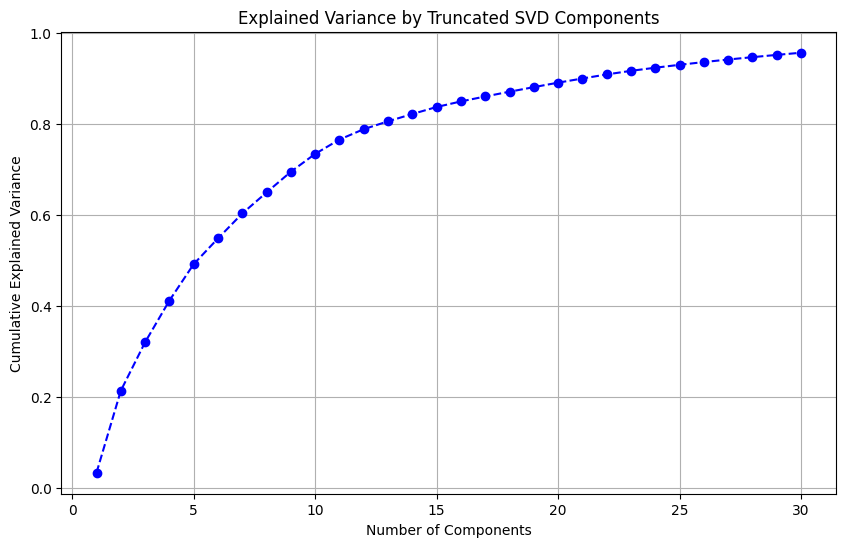

/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'SVD-GradientBoosting'.
2024/12/19 18:38:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVD-GradientBoosting, version 1
Created versi

🏃 View run Experiment5-TruncatedSVD at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/424010ce179c4fe09ec21434ae993843
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1
F1 Score: 0.6529
Accuracy: 0.7565
Confusion Matrix: TP=0, TN=3563, FP=7, FN=1140


In [638]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import mlflow
from mlflow.models import infer_signature

# TruncatedSVD with pipeline integration
pipeline_svd = Pipeline([
    ("preprocessing", preprocessing),
    ("svd", TruncatedSVD(n_components=30, random_state=42)),  # Reduce to 30 components
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline to the training data
pipeline_svd.fit(X_train, y_train)

# Extract SVD component information
svd_step = pipeline_svd.named_steps["svd"]
explained_variance_ratio = svd_step.explained_variance_ratio_

# Scree plot for SVD components
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    np.cumsum(explained_variance_ratio),
    marker="o",
    linestyle="--",
    color="b",
)
plt.title("Explained Variance by Truncated SVD Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Evaluate the model on the test data
y_pred = pipeline_svd.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Log results in MLFlow
MLFLOW_TRACKING_URI = "https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow"
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("insurance_renewal-eas501")

with mlflow.start_run():
    # Log hyperparameters
    mlflow.log_params(pipeline_svd.named_steps["classifier"].get_params())
    mlflow.set_tag("mlflow.runName", "Experiment5-TruncatedSVD")

    # Log metrics
    mlflow.log_metric("f1-score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("true_positives", tp)
    mlflow.log_metric("true_negatives", tn)
    mlflow.log_metric("false_positives", fp)
    mlflow.log_metric("false_negatives", fn)

    # Infer signature and log the model
    signature = infer_signature(X_train, pipeline_svd.predict(X_train))
    mlflow.sklearn.log_model(
        sk_model=pipeline_svd,
        artifact_path="svd_gb_model",
        signature=signature,
        input_example=X_train.iloc[:1],
        registered_model_name="SVD-GradientBoosting"
    )

# Store the final model for further use
pca_xg_boost = pipeline_svd

# Print results
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


# Experiment 6 - Recursive  Feature elimenation

In [604]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import mlflow
from mlflow.models import infer_signature
import os

# Step 1: Preprocess the data
X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed = preprocessing.transform(X_test)

cat_features = preprocessing.named_transformers_["pipeline-2"].named_steps["onehot"].get_feature_names_out()
num_features = X_train.select_dtypes(include=np.number).columns

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=np.concatenate([num_features, cat_features]))
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed.toarray(), columns=np.concatenate([num_features, cat_features]))

# Step 2: Apply RFE with XGBoost
xgb_estimator = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
rfe = RFE(estimator=xgb_estimator, n_features_to_select=10, step=1)
rfe.fit(X_train_preprocessed_df, y_train)

# Selected features
selected_features = X_train_preprocessed_df.columns[rfe.support_]
print(f"Selected Features: {selected_features.tolist()}")

X_train_rfe = X_train_preprocessed_df[selected_features]
X_test_rfe = X_test_preprocessed_df[selected_features]

# Step 3: Train the model using selected features
final_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
final_model.fit(X_train_rfe, y_train)

# Predictions
y_pred = final_model.predict(X_test_rfe)

# Metrics
test_f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Step 4: Log results in MLFlow
MLFLOW_TRACKING_URI = "https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'vamsisaigarapati'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '9a9f8cd0f5d6a9b86bfb91d57b6f708bf327ae6a'
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("insurance_renewal-eas501")

with mlflow.start_run():
    # Log RFE parameters
    mlflow.log_param("n_features_selected", len(selected_features))
    mlflow.log_param("selected_features", selected_features.tolist())
    mlflow.set_tag("mlflow.runName", "Experiment6-RFE-XGBoost")

    # Log metrics
    mlflow.log_metric("f1-score", test_f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("true_positives", tp)
    mlflow.log_metric("true_negatives", tn)
    mlflow.log_metric("false_positives", fp)
    mlflow.log_metric("false_negatives", fn)

    # Infer signature and log the model
    signature = infer_signature(X_test_rfe, y_pred)
    mlflow.sklearn.log_model(
        sk_model=final_model,
        artifact_path="rfe_xgb_model",
        signature=signature,
        input_example=X_test_rfe[:1],
        registered_model_name="RFE-XGB-Insurance-Renewal"
    )

# Print results
print(f"F1-Score: {test_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Selected Features: ['Upper_Age', 'Holding_Policy_Duration', 'x0_C1', 'x0_C18', 'x0_C2', 'x0_C3', 'x2_Individual', 'x4_X4', 'x4_X5', 'x5_1.0']


Successfully registered model 'RFE-XGB-Insurance-Renewal'.
2024/12/19 17:45:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RFE-XGB-Insurance-Renewal, version 1
Created version '1' of model 'RFE-XGB-Insurance-Renewal'.


🏃 View run Experiment6-RFE-XGBoost at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/7cdf70bb6ac743c4a0c80896f6e7694e
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1
F1-Score: 0.6574
Accuracy: 0.7493
Confusion Matrix: TP=22, TN=3507, FP=63, FN=1118


# Experiment 7 - polynomial features

In [606]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import mlflow
from mlflow.models import infer_signature
import os

# Step 1: Redefine preprocessing pipeline with Polynomial Features
# Polynomial Features for numeric columns
poly_features = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ("scaler", StandardScaler())
])

# Updated preprocessing pipeline
updated_preprocessing = ColumnTransformer(transformers=[
    ("num_poly", poly_features, make_column_selector(dtype_include=np.number)),  # Numeric columns with interactions
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))  # Categorical columns
])

# Full pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", updated_preprocessing),
    ("classifier", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"))
])

# Step 2: Fit and evaluate the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Metrics
test_f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Step 3: Log results in MLFlow
MLFLOW_TRACKING_URI = "https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'vamsisaigarapati'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '9a9f8cd0f5d6a9b86bfb91d57b6f708bf327ae6a'
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("insurance_renewal-eas501")

with mlflow.start_run():
    # Log model parameters
    mlflow.log_param("poly_degree", 2)
    mlflow.log_param("interaction_only", True)
    mlflow.set_tag("mlflow.runName", "Experiment7-PolyFeatures-XGBoost")

    # Log metrics
    mlflow.log_metric("f1-score", test_f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("true_positives", tp)
    mlflow.log_metric("true_negatives", tn)
    mlflow.log_metric("false_positives", fp)
    mlflow.log_metric("false_negatives", fn)

    # Infer signature and log the model
    signature = infer_signature(X_test, y_pred)
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="poly_xgb_model",
        signature=signature,
        input_example=X_test.iloc[:1],
        registered_model_name="Poly-XGB-Insurance-Renewal"
    )

# Print results
print(f"F1-Score: {test_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Succ

🏃 View run Experiment7-PolyFeatures-XGBoost at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1/runs/a4c92b4510c64f8e8767021ebaf0f7fc
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/insurance_renewal.mlflow/#/experiments/1
F1-Score: 0.6579
Accuracy: 0.7450
Confusion Matrix: TP=30, TN=3479, FP=91, FN=1110


# finding Best Model

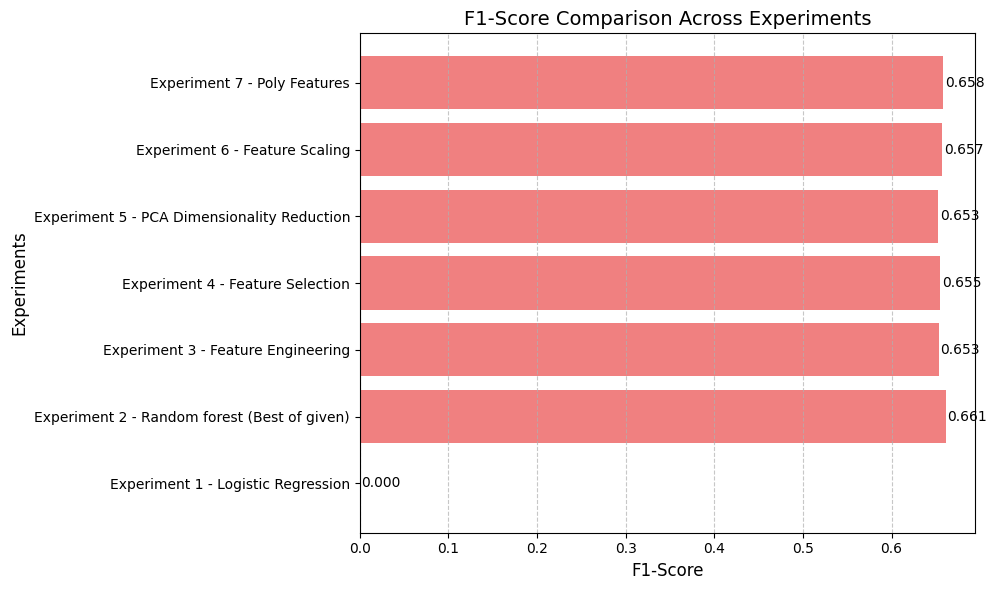

In [24]:
# Updated experiment names and F1-scores
experiment_names = [
    "Experiment 1 - Logistic Regression",
    "Experiment 2 - Random forest (Best of given)",
    "Experiment 3 - Feature Engineering",
    "Experiment 4 - Feature Selection",
    "Experiment 5 - PCA Dimensionality Reduction",
    "Experiment 6 - Feature Scaling",
    "Experiment 7 - Poly Features"
]

f1_scores = [0, 0.660963042037267, 0.6529997627401654, 0.6549402969634956, 0.6528750959494511, 0.657423812698834, 0.6579067441208764]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(experiment_names, f1_scores, color="lightcoral")
plt.xlabel("F1-Score", fontsize=12)
plt.ylabel("Experiments", fontsize=12)
plt.title("F1-Score Comparison Across Experiments", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Annotate scores
for index, score in enumerate(f1_scores):
    plt.text(score + 0.002, index, f"{score:.3f}", va="center", fontsize=10)

plt.tight_layout()
plt.show()


#### Best Model is Model got from Random forest classifier

In [644]:
random_forest_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler()),
                                                                  ('minmax',
                                                                   MinMaxScaler()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x3326182f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x17d9c1a00>)])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [646]:
# import joblib
# joblib.dump(random_forest_pipeline, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']

In [658]:
f1_score(y_test, random_forest_pipeline.predict(X_test), average="weighted")

0.660963042037267

# Saving the Model as pkl

In [648]:
import joblib
final_model_reloaded = joblib.load("random_forest_pipeline.pkl")

In [650]:
!pip install dill

In [654]:
import dill
with open('random_forest_pipeline.pkl', 'wb') as f:
    dill.dump(random_forest_pipeline, f)

In [13]:
import dill
with open('random_forest_pipeline.pkl', 'rb') as f:
    reloaded_model = dill.load(f)

In [15]:
f1_score(y_test, reloaded_model.predict(X_test), average="weighted")

0.660963042037267

In [21]:
X_train.iloc[0]

Upper_Age                       55
Lower_Age                       52
Reco_Policy_Premium        26374.4
City_Code                       C3
Accomodation_Type            Owned
Reco_Insurance_Type          Joint
Is_Spouse                      Yes
Health_Indicator                X2
Holding_Policy_Duration       14.0
Holding_Policy_Type            3.0
Name: 1336, dtype: object

In [ ]:
!pip install fastapi

In [45]:
payload.values()
payload.keys()

dict_keys(['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium', 'City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health_Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type'])

In [23]:
reloaded_model.predict(X_train)

array([1, 0, 0, ..., 0, 0, 0])

In [662]:
!pip install requests

# Checking the response form FastApi

In [79]:
import requests
import json
data={
  "Upper_Age": 55,
  "Lower_Age": 52,
  "Reco_Policy_Premium": 26374.4,
  "City_Code": "C3",
  "Accomodation_Type": "Owned",
  "Reco_Insurance_Type": "Joint",
  "Is_Spouse": "Yes",
  "Health_Indicator": "X2",
  "Holding_Policy_Duration": 14.0,
  "Holding_Policy_Type": "3.0"
}

data = json.dumps(data)
print(data)
r = requests.post('http://146.190.77.217:8002/predict', data=data)

{"Upper_Age": 55, "Lower_Age": 52, "Reco_Policy_Premium": 26374.4, "City_Code": "C3", "Accomodation_Type": "Owned", "Reco_Insurance_Type": "Joint", "Is_Spouse": "Yes", "Health_Indicator": "X2", "Holding_Policy_Duration": 14.0, "Holding_Policy_Type": "3.0"}


In [81]:
r.json()

{'prediction': 'The customer possibly cannot renew the Insurance plan'}

In [73]:
insurance.dtypes

Upper_Age                    int64
Lower_Age                    int64
Reco_Policy_Premium        float64
City_Code                   object
Accomodation_Type           object
Reco_Insurance_Type         object
Is_Spouse                   object
Health_Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type         object
class                        int64
dtype: object

In [75]:
insurance = insurance.drop("class", axis=1)

# Creating the Streamlit json file for sliders and dropdowns

In [77]:
import math

slider_fields = [
    "Upper_Age",
    "Lower_Age",
    "Reco_Policy_Premium",
    "Holding_Policy_Duration",
]

single_select_fields = [
    "City_Code",
    "Accomodation_Type",
    "Reco_Insurance_Type",
    "Is_Spouse",
    "Health_Indicator",
    "Holding_Policy_Type",
]
from collections import defaultdict
streamlit_field_data = defaultdict(dict)

for field in slider_fields:
    streamlit_field_data["slider_fields"][field] = [math.floor(insurance[field].min()), math.ceil(insurance[field].max())]

for field in single_select_fields:
    streamlit_field_data["single_select_fields"][field] = sorted(insurance[field].unique())

import json
json.dump(streamlit_field_data, open("streamlit_options.json", "w"), indent=2)